In [2]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: prophet in c:\users\ajayv\appdata\local\programs\python\python311\lib\site-packages (1.1.5)




[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#step-1: extract bitcoin prices: yf

In [4]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached Cython-3.0.4-cp311-cp311-win_amd64.whl (2.8 MB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached PyMeeus-0.5.12.tar.gz (5.8 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached ephem-4.1.5-cp311-cp311-win_amd64.whl (1.4 MB)
  Using cached aiohttp-3.8.6-cp311-cp311-win_amd64.whl (322 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached pystan-3.6.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.5.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.4.0-py3-none-any.whl (13 kB)
  Usi

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\ajayv\AppData\Local\Temp\pip-install-cqvl5ade\pystan_cd657bed0c144e77863de02711408c41\setup.py", line 122, in <module>
          from Cython.Build.Inline import _get_build_extension
      ModuleNotFoundError: No module named 'Cython'
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

c:\Users\ajayv\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [7]:
df=yf.download('BTC-USD')

[*********************100%%**********************]  1 of 1 completed


In [8]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-10-26,34504.289062,34832.910156,33762.324219,34156.648438,34156.648438,19427195376
2023-10-27,34156.500000,34238.210938,33416.886719,33909.800781,33909.800781,16418032871
2023-10-28,33907.722656,34399.390625,33874.804688,34089.574219,34089.574219,10160330825


In [9]:
df.reset_index(inplace=True)
df=df[['Date','Adj Close']]

In [10]:
df

,Date,Adj Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3326,2023-10-26,34156.648438
3327,2023-10-27,33909.800781
3328,2023-10-28,34089.574219
3329,2023-10-29,34538.480469


In [11]:
df.columns=['ds','y']

In [12]:
df

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3326,2023-10-26,34156.648438
3327,2023-10-27,33909.800781
3328,2023-10-28,34089.574219
3329,2023-10-29,34538.480469


In [13]:
model=Prophet()

In [14]:
model.fit(df)

20:35:20 - cmdstanpy - INFO - Chain [1] start processing
20:35:22 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
import pickle
with open('bitcoin.pkl','wb') as f:
    pickle.dump(model,f)

In [15]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [16]:
df.tail()

,ds,y
3326,2023-10-26,34156.648438
3327,2023-10-27,33909.800781
3328,2023-10-28,34089.574219
3329,2023-10-29,34538.480469
3330,2023-10-30,34661.988281


In [17]:
future_dates=model.make_future_dataframe(periods=60)

In [18]:
future_dates

,ds
0,2014-09-17
1,2014-09-18
2,2014-09-19
3,2014-09-20
4,2014-09-21
...,...
3386,2023-12-25
3387,2023-12-26
3388,2023-12-27
3389,2023-12-28


In [19]:
future_dates

,ds
0,2014-09-17
1,2014-09-18
2,2014-09-19
3,2014-09-20
4,2014-09-21
...,...
3386,2023-12-25
3387,2023-12-26
3388,2023-12-27
3389,2023-12-28


In [28]:
model.predict(pd.DataFrame(['2023-11-09'],columns=['ds']))

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-11-09,18405.720497,12094.668472,25985.083766,18405.720497,18405.720497,227.528552,227.528552,227.528552,-28.396757,-28.396757,-28.396757,255.925309,255.925309,255.925309,0.0,0.0,0.0,18633.249049


In [20]:
prediction=model.predict(future_dates)

In [21]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3386,2023-12-25,16944.652749,9221.256857,23742.777819,16687.337635,17134.887608,-378.967220,-378.967220,-378.967220,19.984506,19.984506,19.984506,-398.951726,-398.951726,-398.951726,0.0,0.0,0.0,16565.685529
3387,2023-12-26,16912.890406,9318.488540,23697.267600,16637.446150,17112.577803,-319.215113,-319.215113,-319.215113,-7.908192,-7.908192,-7.908192,-311.306921,-311.306921,-311.306921,0.0,0.0,0.0,16593.675293
3388,2023-12-27,16881.128064,9416.959830,23438.061508,16590.242413,17090.424687,-200.562476,-200.562476,-200.562476,19.999685,19.999685,19.999685,-220.562160,-220.562160,-220.562160,0.0,0.0,0.0,16680.565588
3389,2023-12-28,16849.365722,9557.504867,23486.737765,16543.289121,17064.853135,-156.855319,-156.855319,-156.855319,-28.396757,-28.396757,-28.396757,-128.458562,-128.458562,-128.458562,0.0,0.0,0.0,16692.510403
3390,2023-12-29,16817.603379,9885.385430,24196.251636,16502.657795,17036.806496,-49.511998,-49.511998,-49.511998,-12.672974,-12.672974,-12.672974,-36.839023,-36.839023,-36.839023,0.0,0.0,0.0,16768.091382


c:\Users\ajayv\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\ajayv\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


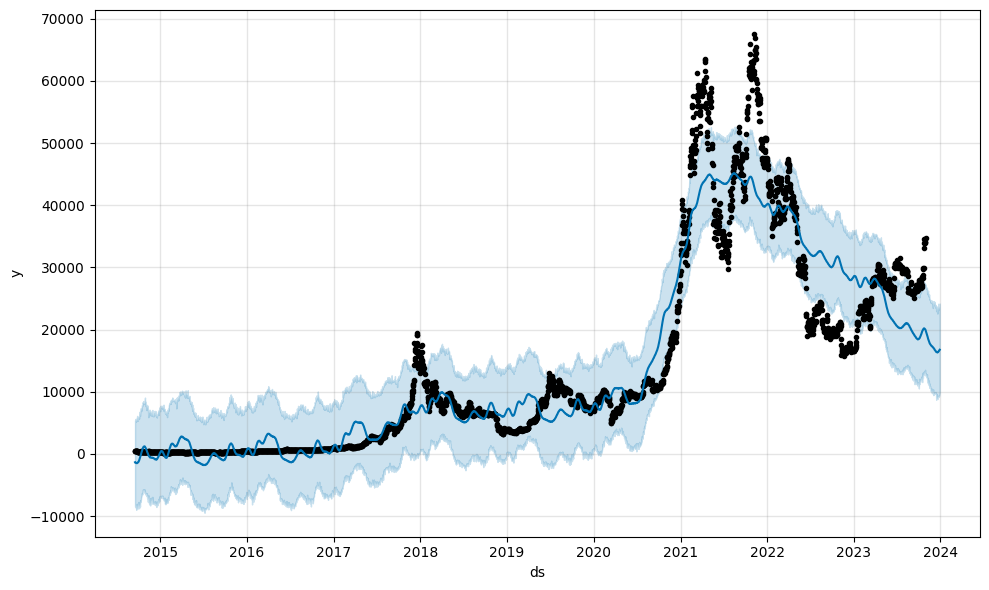

In [22]:
fig=model.plot(prediction)

In [23]:
#black=actual prices
#dark blue=predicted prices
#light blue=range of predictions (upper and lower)

In [24]:
from prophet.plot import plot_plotly
plot_plotly(model,prediction)      #for selecting data upto certain time

NameError: name 'go' is not defined

In [ ]:
fig2=model.plot_components(prediction)  #seasonality prediction

: 

In [ ]:
from prophet.diagnostics import cross_validation

: 

In [ ]:
df_cv=cross_validation(model,horizon='60 days')

: 

In [ ]:
df_cv.tail()

: 

In [ ]:
from prophet.diagnostics import performance_metrics

: 

In [ ]:
df_perf=performance_metrics(df_cv)

: 

In [ ]:
df_perf

: 

In [ ]:
from prophet import plot
fig3=plot.plot_cross_validation_metric(df_cv,metric='mape')

: 

: 